# Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
pokemon = pd.read_csv('../Matplotlib/data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10) 

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


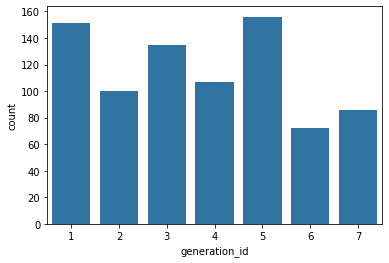

In [3]:
# Get first color_pallete and set it as color of the chart
base_color = sb.color_palette()[0]
# generate graph 
sb.countplot(data = pokemon, x = 'generation_id', color = base_color )

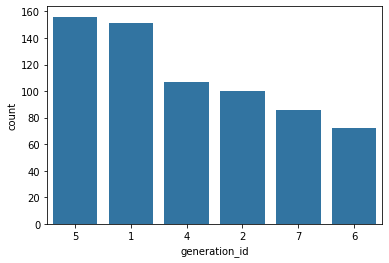

In [4]:
# generate ordered graph
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = (5,1,4,2,7,6) )

In [5]:
# Get order automatically
gen_order = pokemon['generation_id'].value_counts().index

In [6]:
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

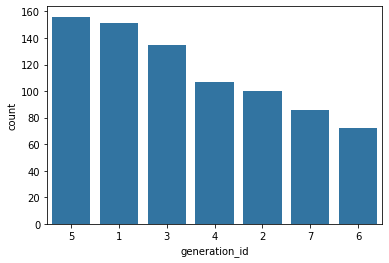

In [7]:
# generate ordered graph
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order );

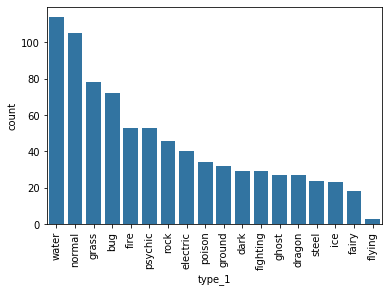

In [8]:
# generate ordered graph for type_1 pokemons
gen_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, x = 'type_1', color = base_color, order = gen_order );
# rotate values on x axe
plt.xticks(rotation = 90);

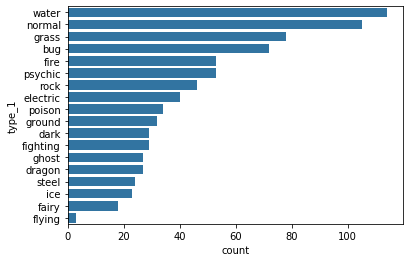

In [9]:
# make horizontal barchar
sb.countplot(data = pokemon,
             y = 'type_1', 
             color = base_color, 
             order = gen_order );

# Absolute vs Relative Frequency

In [10]:
import pandas as pd
import seaborn as sb
pokemon = pd.read_csv('../Matplotlib/data/pokemon.csv')
pokemon.head(10)
pkmn_types = pokemon.melt(id_vars = ['id'],
                         value_vars = ['type_1', 'type_2'],
                         var_name = 'type_level',
                         value_name = 'type')
pkmn_types[802:812]


,id,type_level,type
802,803,type_1,poison
803,804,type_1,poison
804,805,type_1,rock
805,806,type_1,fire
806,807,type_1,electric
807,1,type_2,poison
808,2,type_2,poison
809,3,type_2,poison
810,4,type_2,NaN
811,5,type_2,NaN


In [11]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

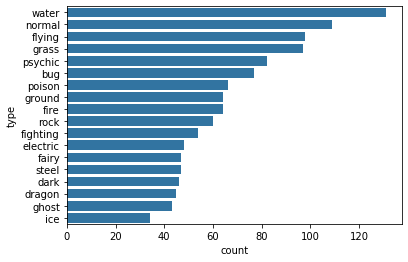

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color= base_color, order = type_order)

# Relative way of processing the same data

In [13]:
# number of pokemons
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
# print(pokemon.shape[0])
max_prop = max_type_count / n_pokemon
# print(max_prop)

In [14]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

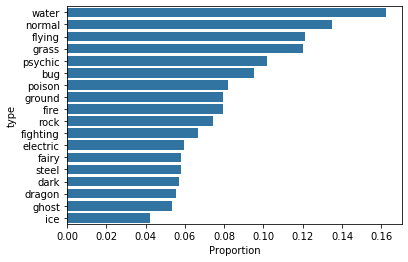

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, 
             y = 'type', color= base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('Proportion');

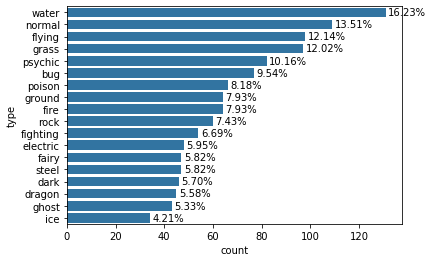

In [16]:
n_pokemon = pokemon.shape[0]
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color= base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = f'{100*count/n_pokemon:0.2f}%'
    plt.text(count+1,  i, pct_string, va = 'center');

# Counting Missing Data

One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column


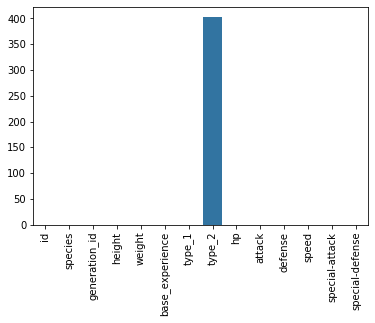

In [17]:
# What if we want to visualize these missing value counts? We could treat the variable names as levels of 
# a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, 
# unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is
# built to depict a summary of one quantitative variable against levels of a second, qualitative variable, 
# but can be used here.

na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);
# The first argument to the function contains the x-values (column names), the second argument the y-values
# (our counts).


# Pie Charts


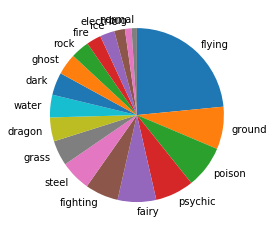

In [18]:
# code for the pie chart seen above
sorted_counts = pokemon['type_2'].value_counts()
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90,
        counterclock = False);


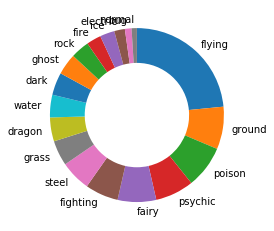

In [19]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});

# Histograms

## For Quantitative variables

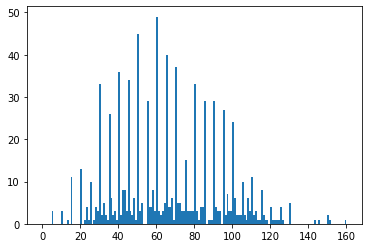

In [20]:
# bins are "bit wide" on 'X' axis.
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);


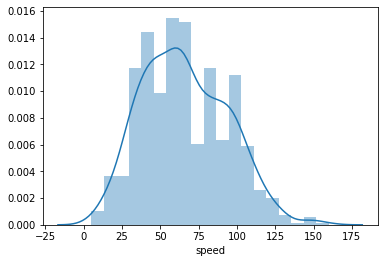

In [21]:
sb.distplot(pokemon['speed']);

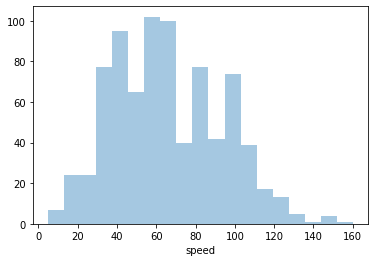

In [22]:
sb.distplot(pokemon['speed'], kde=False);

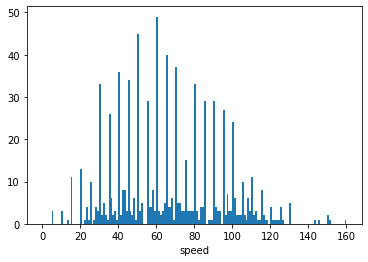

In [23]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins=bin_edges, kde=False, 
            hist_kws = {'alpha':1});

# Figures, Axes, and Subplots

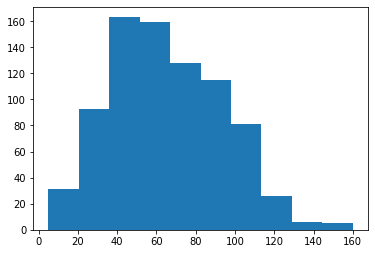

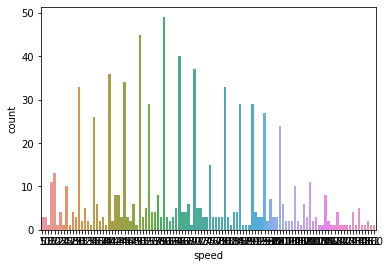

In [24]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
ax.hist(data=pokemon, x = 'speed');


fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
sb.countplot(data=pokemon, x = 'speed', ax=ax);

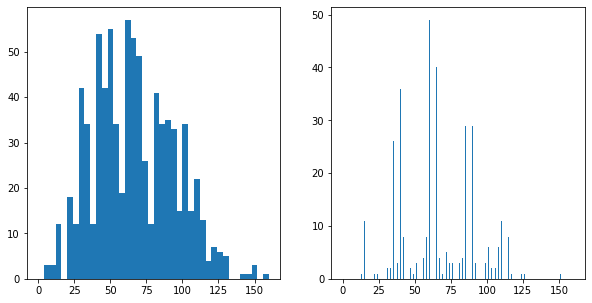

In [25]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

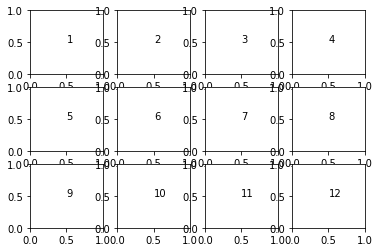

In [26]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

# Choosing a Plot for Discrete Data

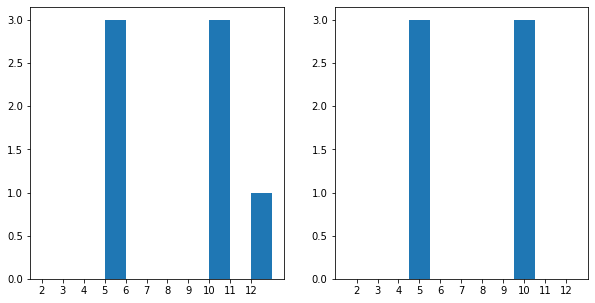

In [27]:
plt.figure(figsize = [10, 5])
die_rolls = pokemon['speed']
# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

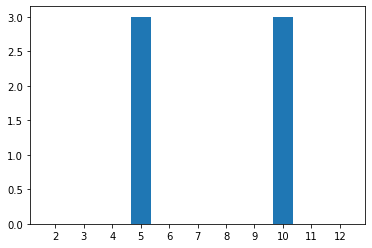

In [28]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

# Descriptive Statistics, Outliers, and Axis Limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments to the same result.

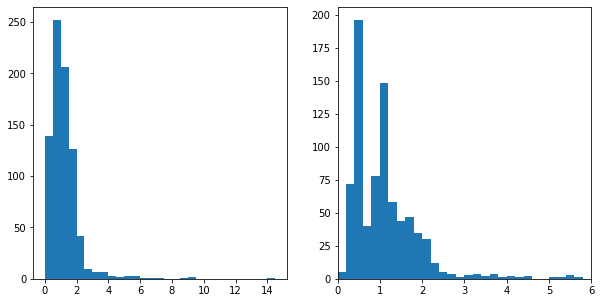

In [29]:
# 
plt.figure(figsize = [10, 5])
plt.subplot(1,2,1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x = 'height', bins=bins);

# Zoom in the data with xlim(from 0 to 6).
plt.subplot(1,2,2)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x = 'height', bins=bins);
plt.xlim((0,6));

# Scales and Transformations

Text(0.5, 0, 'log(values)')

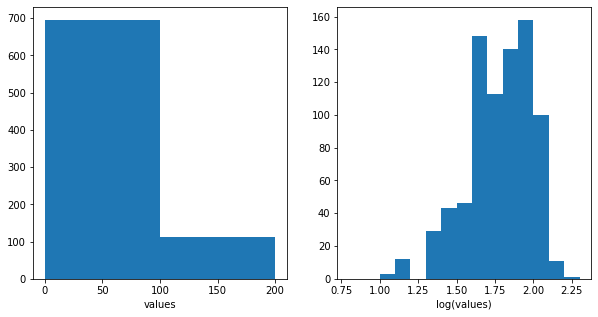

In [30]:
plt.figure(figsize = [10, 5])
data = pokemon['speed']
# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, data.max()+100, 100)
plt.hist(data, bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(data) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

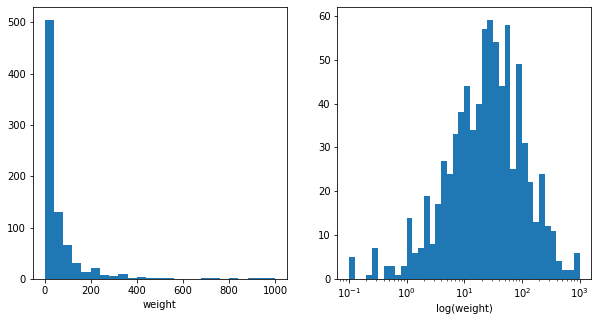

In [31]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xlabel('weight')


# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
#log_data = np.log10(pokemon['weight']) # direct data transform
#log_bin_edges = np.arange(0.8, pokemon['weight'].max()+0.1, 0.1)
log_bin_edges = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bin_edges);
plt.xscale('log');
plt.xlabel('log(weight)');


#plt.subplot(2, 1, 1)




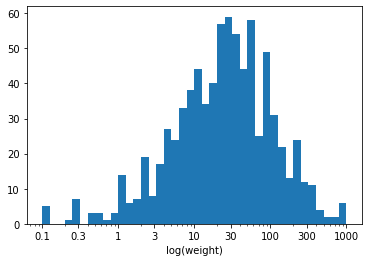

In [32]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log(weight)');
# Note: xticks are specified after xscale
plt.xticks(ticks, labels);

# Scales and Transformations


Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)

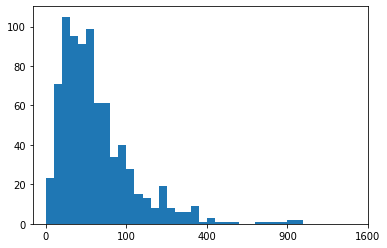

In [33]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
data = pokemon['weight']
    
bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

# Extra: Kernel Density Estimation

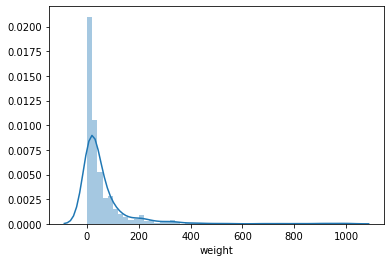

In [34]:
# Earlier in this lesson, you saw an example of kernel 
# density estimation (KDE) through the use of seaborn's 
# distplot function, which plots a KDE on top of a histogram.
sb.distplot(pokemon['weight'])


Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot. In a rugplot, data points are depicted as dashes on a number line.

/home/zz1460/prj/Learn_Udacity_AI_with_Python/venv3/lib/python3.6/site-packages/seaborn/distributions.py:289: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


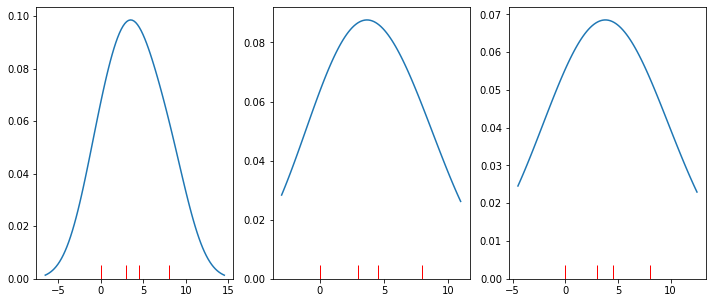

In [35]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

# Scatterplots and Correlation
## Scatterplots for quantitavtive vs quantitative variables

In [36]:
fuel_econ = pd.read_csv('../Matplotlib/data/fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

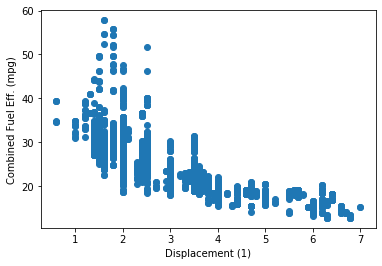

In [37]:
plt.scatter(data=fuel_econ, x = 'displ', y = 'comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

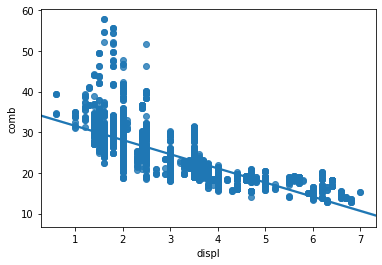

In [38]:
sb.regplot(data=fuel_econ, x = 'displ', y = 'comb')


([<matplotlib.axis.YTick at 0x7fb92703e240>,
 <a list of 6 Text yticklabel objects>)

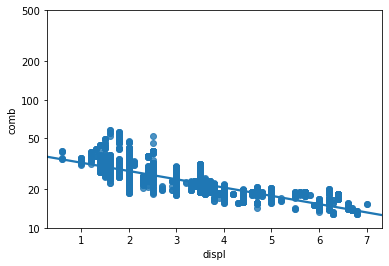

In [39]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)


# Overplotting, Transparency, and Jitter

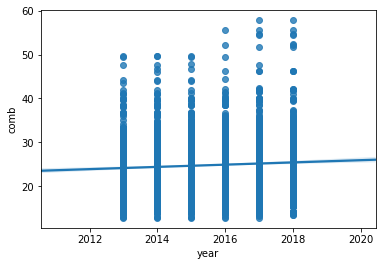

In [40]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');

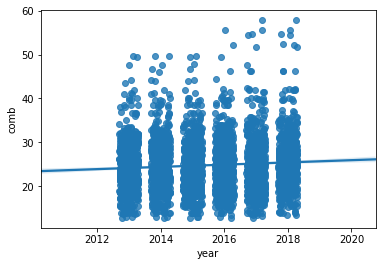

In [41]:
# adding jitter
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);

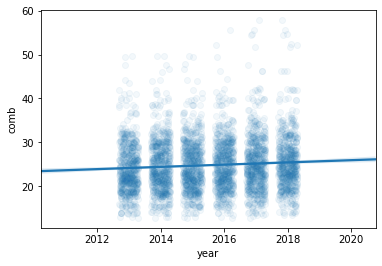

In [42]:
# transperacy
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter =0.3,
          scatter_kws = {'alpha' : 1/20});

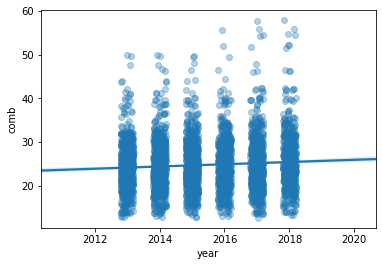

In [43]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.2,
           y_jitter = 0.2,
           scatter_kws = {'alpha' : 1/3});

# Heat Maps

In [44]:
# quantitative vs quantitative variable

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

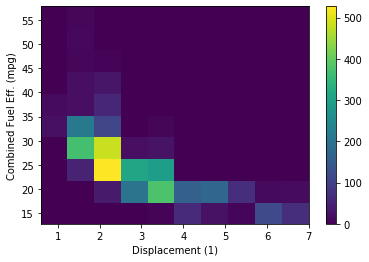

In [45]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

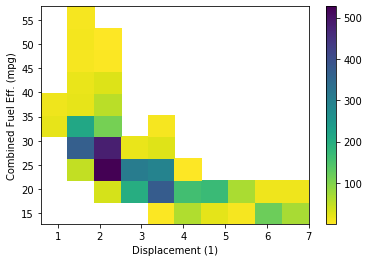

In [46]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb',
           cmin = 0.5, cmap = 'viridis_r',
          );
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [47]:
# check out description and choose bins 
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

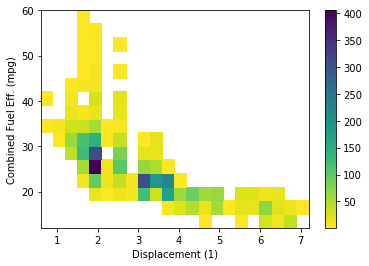

In [48]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb',
           cmin = 0.5, cmap = 'viridis_r',
           bins = [bins_x ,bins_y]
          );
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

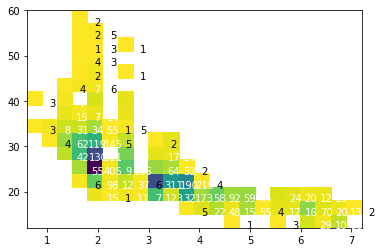

In [49]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')


# Violin Plots









## Violin Plots for Quantitative vx qualitative variables 

In [50]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

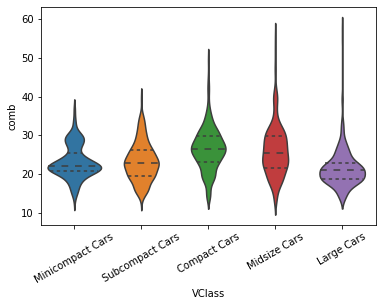

In [51]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
             inner = 'quartile');
plt.xticks(rotation = 30);

# Box Plots

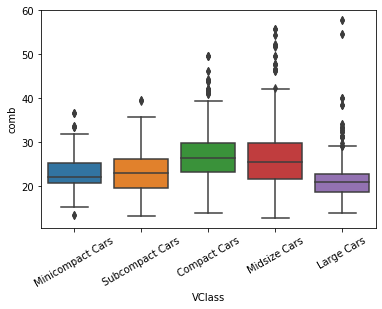

In [52]:
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb');
plt.xticks(rotation = 30);

# Clustered Bar Chards
## qualitative vs quantitative variable 

In [53]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [54]:
# sb.heatmap(ct_counts);
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'VClass', 
                            columns = 'trans_type', values = 'count')

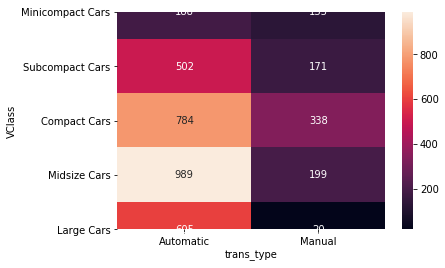

In [55]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

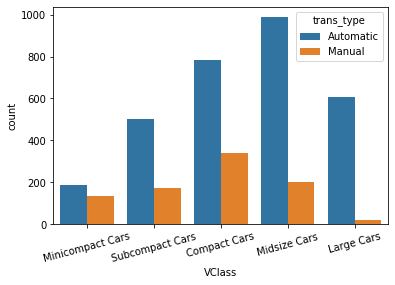

In [56]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation = 15);

# Faceting

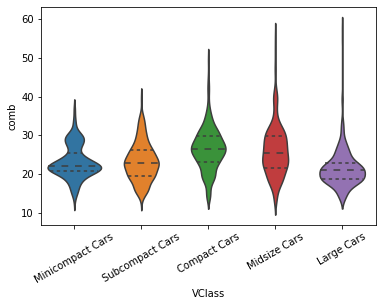

In [57]:
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
             inner = 'quartile');
plt.xticks(rotation = 30);

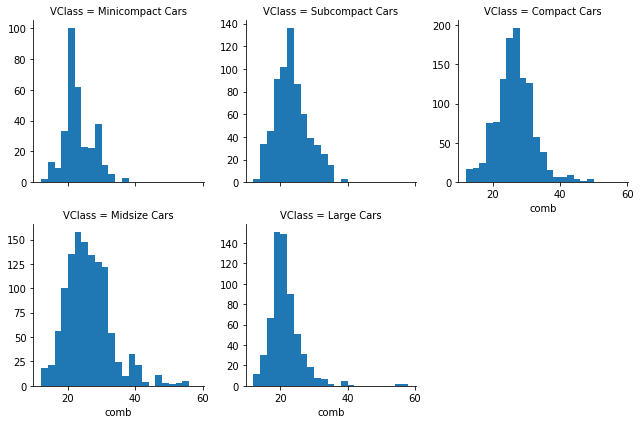

In [58]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3,
                sharey = False);
g.map(plt.hist, 'comb', bins = bins);

# Adaptation of Univariate Plots

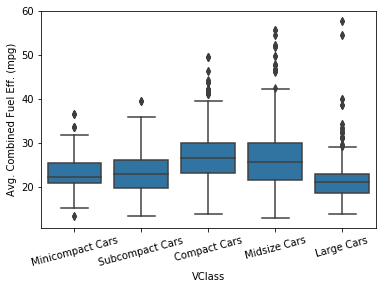

In [59]:
hase_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', 
           color = base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

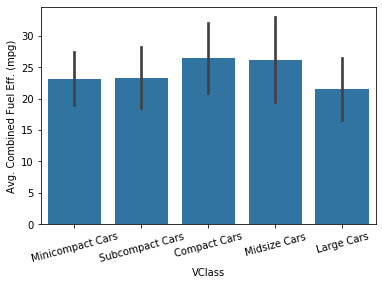

In [60]:
hase_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', 
           color = base_color, ci = 'sd')
# Some barplot options
# errwidth = 0 - disable 
# ci = 'sd' - set to 'standard deviation'
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

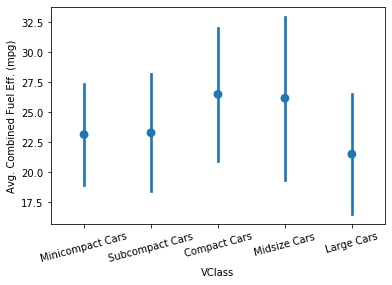

In [61]:
hase_color = sb.color_palette()[0]
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', 
           color = base_color, ci = 'sd', linestyles = '')
# Some pointplot options
# linestyles = ''
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

# Line Plots

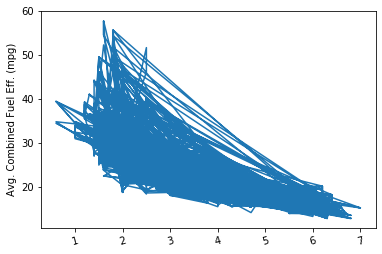

In [62]:
plt.errorbar(data=fuel_econ, x = 'displ', y = 'comb');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [63]:
bins_e  = np.arange(0.6, 7+0.7, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

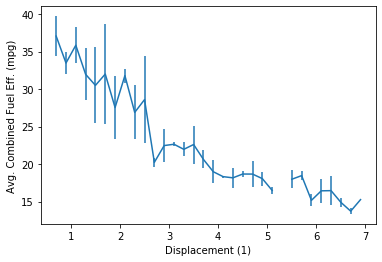

In [64]:
plt.errorbar(x = bins_c, y = comb_mean, yerr  = comb_std);

plt.xlabel('Displacement (1)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

Text(0, 0.5, 'comb')

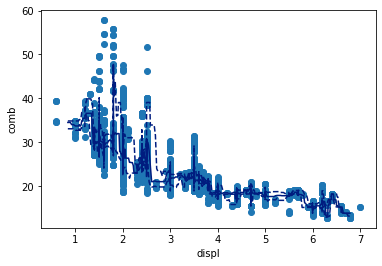

In [65]:
# compute statistics in a rolling window
df = fuel_econ
df_window = df.sort_values('displ').rolling(15)
x_winmean = df_window.mean()['displ']
y_median = df_window.median()['comb']
y_q1 = df_window.quantile(.25)['comb']
y_q3 = df_window.quantile(.75)['comb']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'displ', y = 'comb')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('displ')
plt.ylabel('comb')

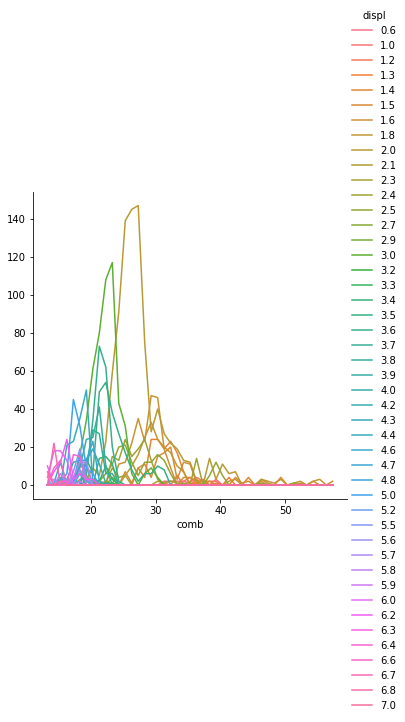

In [72]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

df = fuel_econ;
bin_edges = np.arange(df['comb'].min(), df['comb'].max()+1, 1);
g = sb.FacetGrid(data = df, hue = 'displ', size = 5);
g.map(freq_poly, "comb", bins = bin_edges);
g.add_legend();